In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
from scipy import stats

In [2]:
import pandas as pd

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")
df=df[df['CPHL']!=0]

feature_names = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
                 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
                 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
                 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
label = 'SALINITY'

X = df[feature_names]
y = df[label]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [3]:
# Train the model
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)

RMSE:  0.11906629209270238
p-value:  0.0
r:  0.9428074834374583


## Feature Importance

In [4]:
# Get feature importance scores
feature_importance = rf.feature_importances_
print(feature_importance)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
bands=['400.00', '412.50',  '442.50', '490.00', '510.00', '560.00', '620.00', '665.00', '673.75', '681.25', '708.75', '753.75', '761.25', '764.38', '767.50', '778.75', '865.00', '885.00', '900.00', '940.00', '1020.00']
feature_importance_df['Bands']=bands

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


[0.01294509 0.30001053 0.04450969 0.04823987 0.0518175  0.03492687
 0.03421246 0.0195215  0.01991114 0.01475835 0.01538693 0.0147362
 0.01301992 0.04702082 0.02632101 0.0096965  0.01181208 0.01590503
 0.01419131 0.01649594 0.23456125]
          Feature  Importance    Bands
1   Oa02_radiance    0.300011   412.50
20  Oa21_radiance    0.234561  1020.00
4   Oa05_radiance    0.051817   510.00
3   Oa04_radiance    0.048240   490.00
13  Oa14_radiance    0.047021   764.38
2   Oa03_radiance    0.044510   442.50
5   Oa06_radiance    0.034927   560.00
6   Oa07_radiance    0.034212   620.00
14  Oa15_radiance    0.026321   767.50
8   Oa09_radiance    0.019911   673.75
7   Oa08_radiance    0.019522   665.00
19  Oa20_radiance    0.016496   940.00
17  Oa18_radiance    0.015905   885.00
10  Oa11_radiance    0.015387   708.75
9   Oa10_radiance    0.014758   681.25
11  Oa12_radiance    0.014736   753.75
18  Oa19_radiance    0.014191   900.00
12  Oa13_radiance    0.013020   761.25
0   Oa01_radiance    0.0

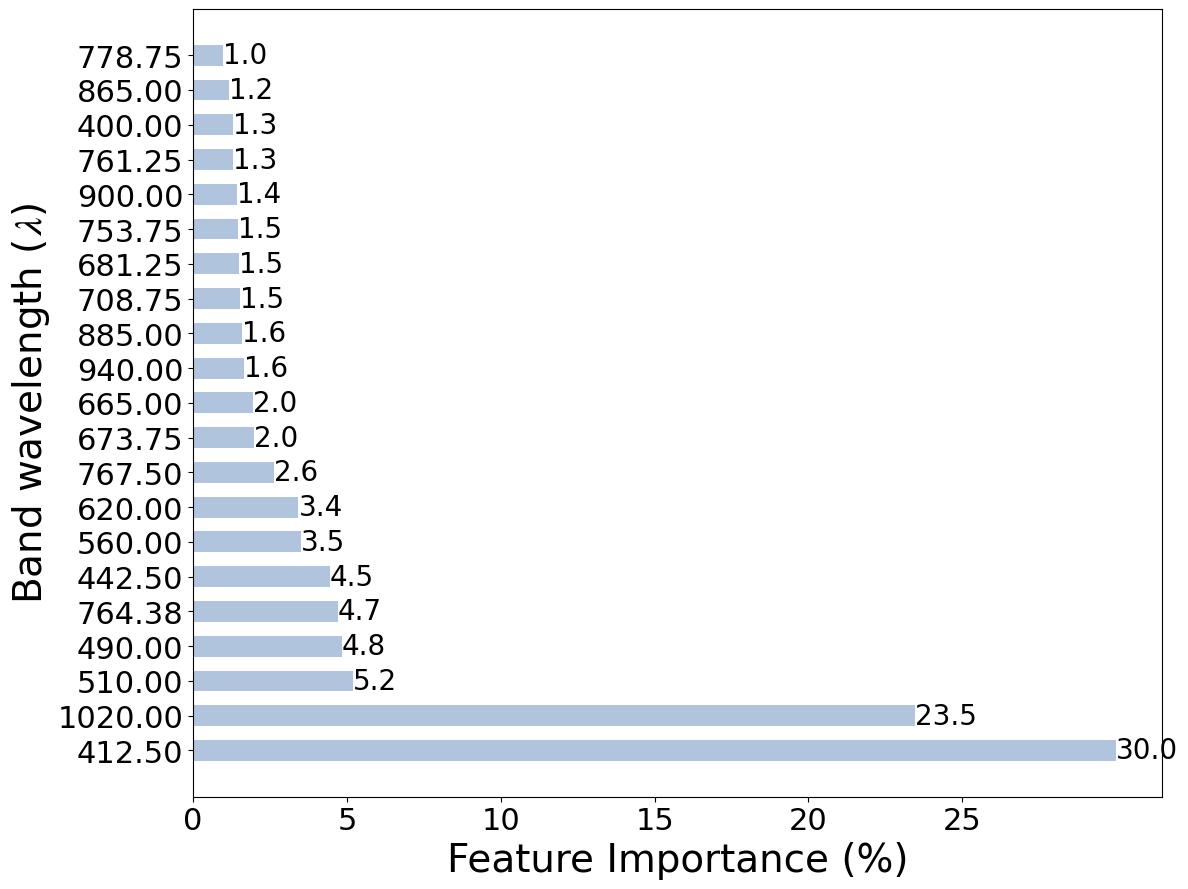

In [5]:
import matplotlib.pyplot as plt
import os

# Sort the feature importance dataframe by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Set figure size
plt.figure(figsize=(12, 9))

# Plot the data with custom colors and make the bars thin
bars = plt.barh(feature_importance_df['Bands'], feature_importance_df['Importance'] * 100, color='lightsteelblue', height=0.6)

# Customize the appearance of the plot
italics_lambda = '\U0001D706'
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Feature Importance (%)', fontsize=28)
plt.ylabel(u'Band wavelength (${\U0001D706}$)', fontsize=28)


# Set x-axis ticks from 0% to 25%
plt.xticks(range(0,30,5))

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', ha='left', va='center', fontsize=20, color='black')

# Invert the y-axis to have the most important features at the bottom
plt.gca().invert_yaxis()
plt.tight_layout()

# #Specify the directory and filename for saving the image
# save_directory = r"D:\MTP\DLR\final_paper"
# file_name = 'feature_importance_plot_sen_rf.pdf'

# # Combine the directory and filename to create the full file path
# full_file_path = os.path.join(save_directory, file_name)

# # Adjust the layout to ensure all elements fit within the saved image
# plt.tight_layout()

# # Save the plot as an image with the specified directory
# plt.savefig(full_file_path, dpi=600)

# # Check if the image file exists
# if os.path.exists(full_file_path):
#     print(f'Image saved successfully to {full_file_path}')
# else:
#     print('Image not saved.')


plt.show()


## RF and RFC

Image saved successfully to D:\MTP\DLR\final_paper\validation_curve.pdf


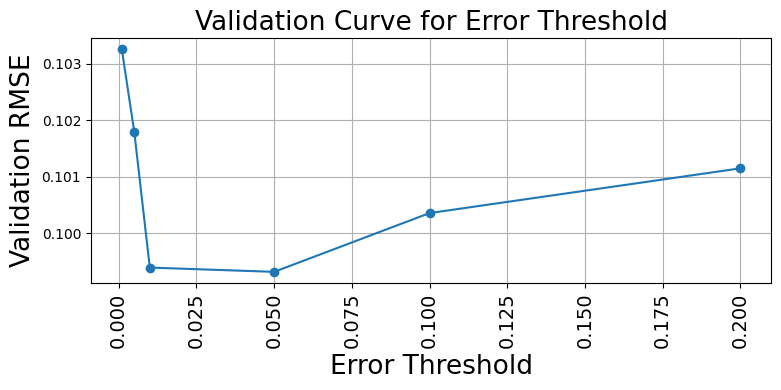

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of error_threshold values to try
# error_thresholds = [0.001, 0.01, 0.1, 0.2, 0.5]
error_thresholds = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

# Lists to store error and threshold values
rmse_values = []

# Train-validation split
X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

# Train models and calculate RMSE for each error_threshold
for threshold in error_thresholds:
    # Train a RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, max_depth=15)
    rf.fit(X_train_cv, y_train_cv.values.ravel())
    
    # Make predictions on the training set
    y_train_pred = rf.predict(X_train_cv)
    
    # Calculate binary labels based on the current threshold
    rf_errors_cv = np.abs(y_train_pred - y_train_cv)
    rf_binary_labels_cv = (rf_errors_cv < threshold).astype(int)
    
    # Train a RandomForestClassifier
    rfc_cv = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc_cv.fit(X_train_cv, rf_binary_labels_cv)
    
    # Make predictions on the validation set
    probabilities_val = rfc_cv.predict_proba(X_val)
    custom_predictions_val = (probabilities_val[:, 1] > threshold).astype(int)
    
    # Calculate RMSE
    y_val_pred_after = rf.predict(X_val[custom_predictions_val > 0.5])
    rmse_rf_rc_val = np.sqrt(mean_squared_error(y_val[custom_predictions_val > 0.5], y_val_pred_after))
    
    rmse_values.append(rmse_rf_rc_val)


# Plot the validation curve
plt.figure(figsize=(8, 4))
plt.plot(error_thresholds, rmse_values, marker='o')
plt.title('Validation Curve for Error Threshold', fontsize=19)
plt.xlabel('Error Threshold',fontsize=19)
plt.ylabel('Validation RMSE',fontsize=19)
# plt.xticks(rotation=90, error_thresholds)
plt.xticks(rotation=90,fontsize=14)
plt.grid(True)


save_directory = r'D:\MTP\DLR\final_paper'
file_name = 'validation_curve.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=500, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [19]:
# Find the best error_threshold based on validation RMSE
best_threshold = error_thresholds[np.argmin(rmse_values)]
best_rmse = min(rmse_values)

print(f'Best error_threshold: {best_threshold}')
print(f'Best validation RMSE: {best_rmse}')

Best error_threshold: 0.05
Best validation RMSE: 0.09931873645716283


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")
df=df[df['CPHL']!=0]
features = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
            'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
            'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
            'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
X = df[features]
target = 'CPHL'
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network for regression
rf = RandomForestRegressor(n_estimators=100, max_depth=15)#, max_features='sqrt')
rf.fit(X_train_scaled, y_train.values.ravel())


y_test_pred = rf.predict(X_test_scaled)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE RF Regression: {rmse_rf}')

y_train_predicted = rf.predict(X_train_scaled)

# absolute errors
rf_errors = np.abs(y_train_predicted- y_train)
error_threshold = 0.1

rf_binary_labels = (rf_errors < error_threshold).astype(int)
print(f'total instances {len(y_train)}')
print(f'good instances {np.sum(rf_binary_labels)}')

# rf_classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, rf_binary_labels)


# Set a custom confidence threshold before making predictions
confidence_threshold = 0.57

# Make predictions and convert probabilities to binary predictions based on the threshold
probabilities = rfc.predict_proba(X_test_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5

# X_test_good=rfc.predict(X_test_scaled)>0.5

# rf_regressor.fit(X_train[y_train_good], y_train[y_train_good])
y_test_pred_after = rf.predict(X_test_scaled[X_test_good])


rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))


print(f'RMSE RF Regression & Classifier: {rmse_rf_rc}')

RMSE RF Regression: 0.09927414482781828
total instances 7761
good instances 7290
RMSE RF Regression & Classifier: 0.09055239376498898


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))
print(f"RMSE: {rmse}")

# Calculate Bias
bias = np.mean(y_test[X_test_good] - y_test_pred_after)
print(f"Bias: {bias}")

# Calculate R2 Score
r2 = r2_score(y_test[X_test_good], y_test_pred_after)
print(f"R2 Score: {r2}")

# Calculate Relative Percent Difference (RPD)
sd_observed = np.std(y_test[X_test_good])
rpd = sd_observed / rmse
print(f"RPD: {rpd}")

# Calculate Absolute Percent Difference (APD)
apd = np.mean(np.abs((y_test[X_test_good] - y_test_pred_after) / y_test[X_test_good])) * 100
print(f"APD: {apd}")


RMSE: 0.09055239376498898
Bias: 0.0024173842539533417
R2 Score: 0.8026901399479519
RPD: 2.251259744854479
APD: 20.390781209653532


RMSE RF Regression: 0.098509992328053
total instances 7761
good instances 7285
RMSE RF Regression & Classifier: 0.08981451385881249
Image saved successfully to D:\MTP\DLR\final_paper\scatter_plot.png


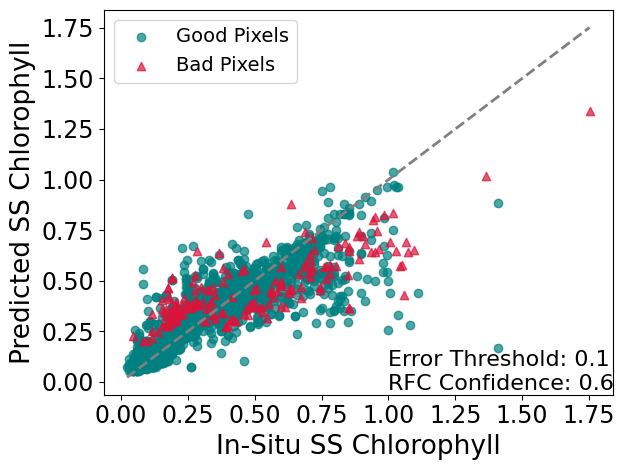

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats
import os
# Load the dataset
df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")
df=df[df['CPHL']!=0]
features = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
            'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
            'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
            'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
X = df[features]
target = 'CPHL'
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 

rf = RandomForestRegressor(n_estimators=100, max_depth=15)#, max_features='sqrt')


# rf.fit(X_train_scaled, y_train.values.ravel())
rf.fit(X_train_scaled, y_train)
y_train_predicted=rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE RF Regression: {rmse_rf}')



# absolute errors
rf_errors = np.abs(y_train_predicted - y_train)
error_threshold = 0.1

rf_binary_labels = (rf_errors < error_threshold).astype(int)
print(f'total instances {len(y_train)}')
print(f'good instances {np.sum(rf_binary_labels)}')

# rf_classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, rf_binary_labels)
# rfc.fit(X_train_scaled, (y_train.values.ravel() > 0.1).astype(int))  

#confidence threshold 
confidence_threshold = 0.6

predicted_probabilities = rfc.predict_proba(X_train_scaled)
probabilities = rfc.predict_proba(X_test_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5
y_test_pred_after = rf.predict(X_test_scaled[X_test_good])
rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))
print(f'RMSE RF Regression & Classifier: {rmse_rf_rc}')

# plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='gray', linewidth=2)

# complete plot
plt.scatter(y_test[custom_predictions == 1], y_test_pred[custom_predictions == 1], label='Good Pixels', alpha=0.7, marker='o',color='teal')
plt.scatter(y_test[custom_predictions == 0], y_test_pred[custom_predictions == 0], label='Bad Pixels', alpha=0.7, marker='^',color='crimson')

# evey 5th point for plotting
selected_indices = np.arange(0, len(y_test), 5)
# plt.scatter(y_test.iloc[selected_indices][custom_predictions[selected_indices] == 1], y_test_pred[selected_indices][custom_predictions[selected_indices] == 1], label='RFC: Class 1', alpha=0.7, marker='o')
# plt.scatter(y_test.iloc[selected_indices][custom_predictions[selected_indices] == 0], y_test_pred[selected_indices][custom_predictions[selected_indices] == 0], label='RFC: Class 0', alpha=0.7, marker='^',color='r')

# plt.text(1.1, 0.27, f'RMSE RF: {rmse_rf:.6f}', fontsize=14, color='black')
# plt.text(1.1, 0.18, f'Error Threshold: {error_threshold}', fontsize=14, color='black')
# plt.text(1.1, 0.09, f'RFC Confidence: {confidence_threshold}', fontsize=14, color='black')
# plt.text(1.1, 0, f'RMSE RFC: {rmse_rf_rc:.5f}', fontsize=14, color='black')


plt.text(1, 0.08, f'Error Threshold: {error_threshold}', fontsize=16, color='black')
plt.text(1, -0.04, f'RFC Confidence: {confidence_threshold}', fontsize=16, color='black')


plt.xlabel('In-Situ SS Chlorophyll', fontsize=19)
plt.ylabel('Predicted SS Chlorophyll', fontsize=19)
plt.legend(fontsize=14)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\DLR\final_paper'
file_name = 'scatter_plot.png'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

In [43]:
print(predicted_probabilities[:,1])

[1.    1.    0.994 ... 0.91  0.99  1.   ]


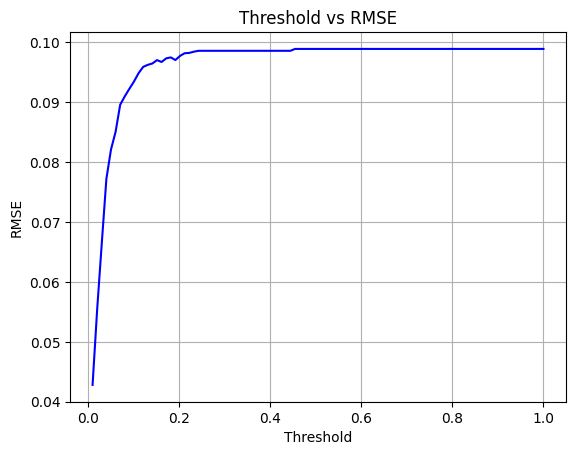

In [6]:
import matplotlib.pyplot as plt

threshold_values = np.linspace(0, 1, 100)

threshold_list = []
rmse_list = []

for threshold in threshold_values:
    rf_binary_labels = (rf_errors < threshold).astype(int)

    rfc.fit(X_train_scaled, rf_binary_labels)

    X_test_good = rfc.predict(X_test_scaled) > 0.5
    
    
    if np.sum(X_test_good) > 0:
        y_pred_after = rf.predict(X_test_scaled[X_test_good])

        rmse = np.sqrt(mean_squared_error(y_test[X_test_good], y_pred_after))

        threshold_list.append(threshold)
        rmse_list.append(rmse)
        
plt.plot(threshold_list, rmse_list, color='blue')
plt.title('Threshold vs RMSE')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


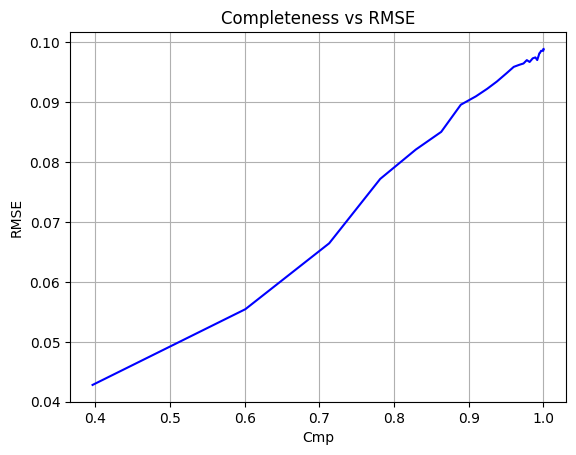

In [12]:
from sklearn.metrics import confusion_matrix

threshold_values = np.linspace(0, 1, 100)

instances_used_list = []
completeness_list=[]

for threshold in threshold_values:
   
    rf_binary_labels = (rf_errors < threshold).astype(int)

    rfc.fit(X_train_scaled, rf_binary_labels)

    X_test_good = rfc.predict(X_test_scaled) > 0.5
     
    
    if np.sum(X_test_good) > 0:

        instances_used = np.sum(rf_binary_labels)
        completeness = instances_used / len(y_train)

        instances_used_list.append(instances_used)
        completeness_list.append(completeness)
    

plt.plot(completeness_list, rmse_list, color='blue')
plt.title('Completeness vs RMSE')
plt.xlabel('Cmp')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


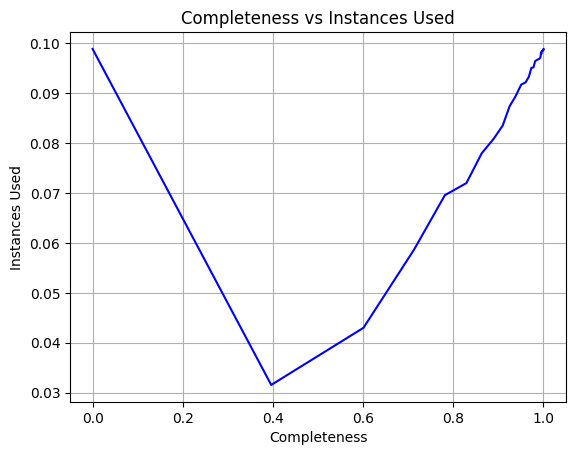

In [13]:
from sklearn.metrics import confusion_matrix

threshold_values = np.linspace(0, 1, 100)

instances_used_list_90 = []
completeness_list_90 = []
rmse_list_90=[]
threshold_list=[]
for threshold in threshold_values:
   
    rf_binary_labels = (rf_errors < threshold).astype(int)

    rfc.fit(X_train_scaled, rf_binary_labels)

    # Get probabilities from the classifier
    probabilities = rfc.predict_proba(X_test_scaled)
    
    # Check if binary or multiclass
    if probabilities.shape[1] == 1:
        # For binary classification
        probabilities = probabilities[:, 0]
    else:
        # For multiclass classification, use the probability of the positive class
        probabilities = probabilities[:, 1]

    # Classify points with more than 90% probability
    X_test_good = probabilities > 0.592
    
    if np.sum(X_test_good) > 0:
        y_pred_after = rf.predict(X_test_scaled[X_test_good])

        rmse = np.sqrt(mean_squared_error(y_test[X_test_good], y_pred_after))

        threshold_list.append(threshold)
        rmse_list_90.append(rmse)
        
        instances_used = np.sum(rf_binary_labels)
        completeness = instances_used / len(y_train)

        instances_used_list_90.append(instances_used)
        completeness_list_90.append(completeness)

plt.plot(completeness_list_90, rmse_list_90, color='blue')
plt.title('Completeness vs Instances Used')
plt.xlabel('Completeness')
plt.ylabel('Instances Used')
plt.grid(True)
plt.show()


Image saved successfully to D:\MTP\DLR\final_paper\completeness_rmse.pdf


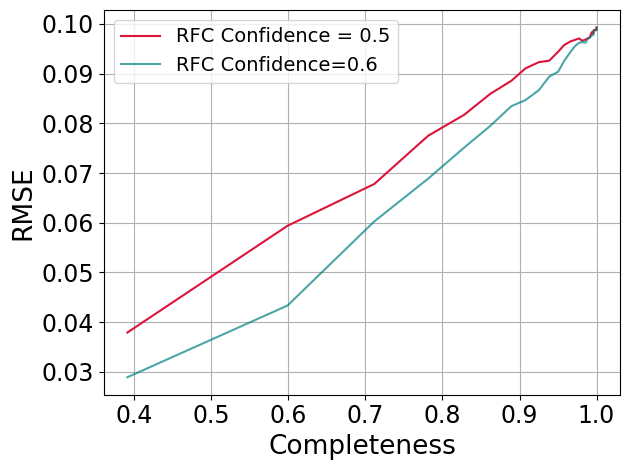

In [9]:
plt.plot(completeness_list, rmse_list, color='crimson',label='RFC Confidence = 0.5')
plt.plot(completeness_list_90[1:], rmse_list_90[1:], label='RFC Confidence=0.6', alpha=0.7, color='teal')
# plt.title('Completeness vs RMSE')
plt.xlabel('Completeness',fontsize=19)
plt.ylabel('RMSE',fontsize=19)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\DLR\final_paper'
file_name = 'completeness_rmse.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

[1.   1.   1.   ... 0.99 1.   1.  ]


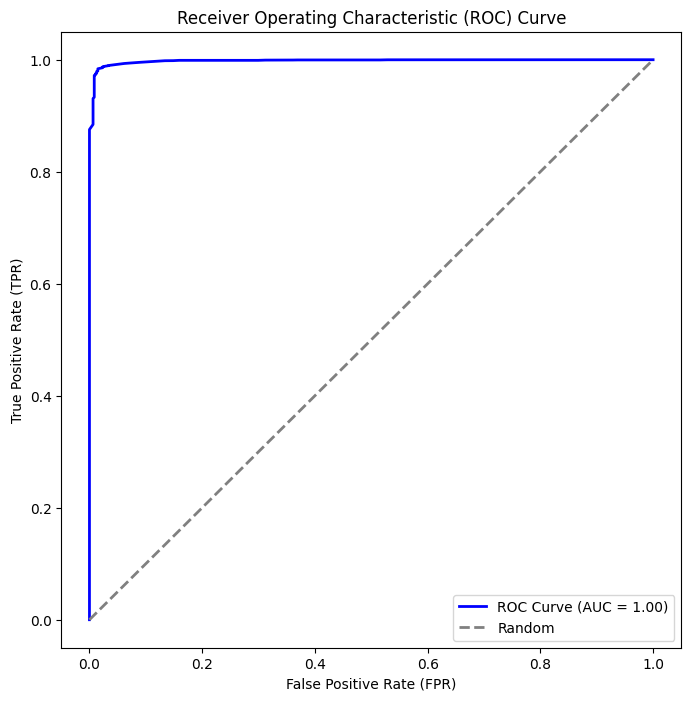

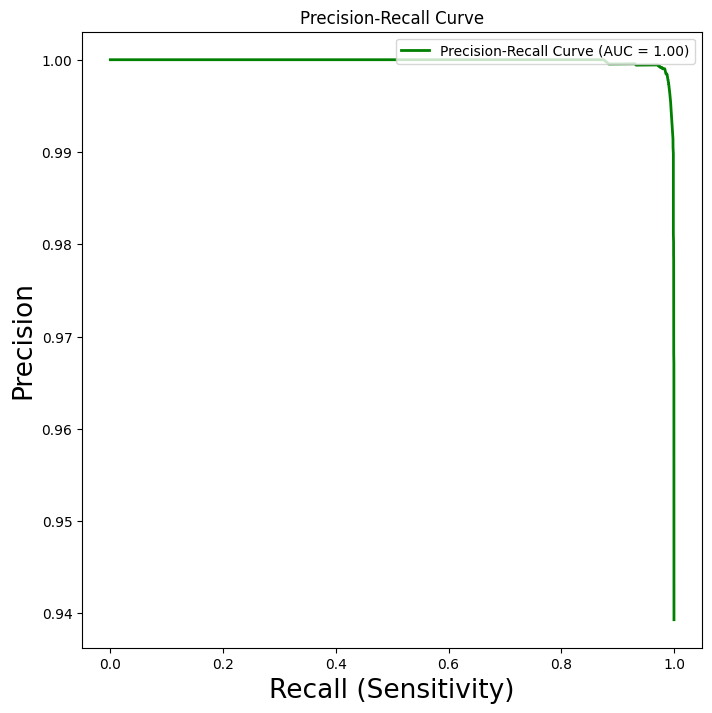

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# X_scaled = scaler.transform(X)
# Get predicted probabilities for class 1

# predicted_probabilities = lr_model.predict_proba(X_scaled)[:, 1]
predicted_probabilities = rfc.predict_proba(X_train_scaled)[:, 1]
print(predicted_probabilities)

# True labels
true_labels = df['CPHL']


# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(rf_binary_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(rf_binary_labels, predicted_probabilities)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Sensitivity)',fontsize=19)
plt.ylabel('Precision',fontsize=19)
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


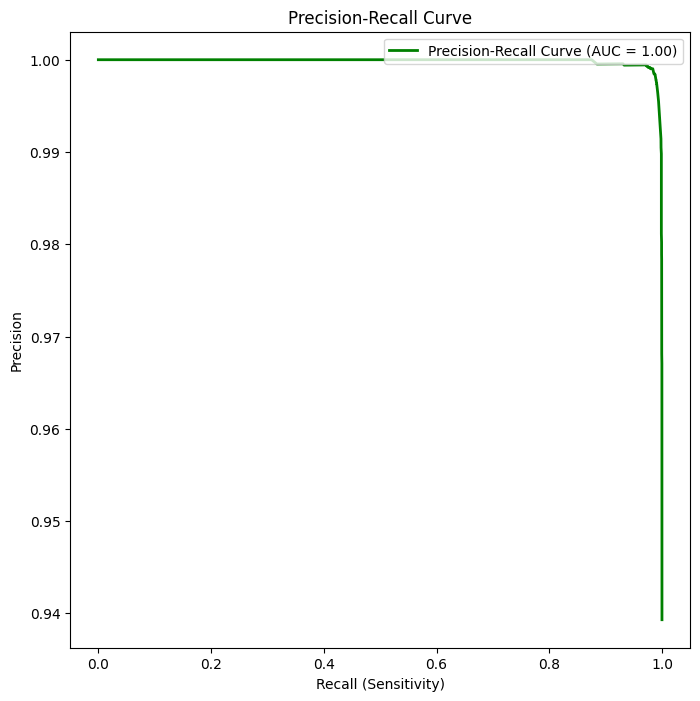

In [21]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [22]:
import numpy as np

# Find the index of the point where precision and recall are closest
intersect_index = np.argmin(np.abs(precision - recall))

# Get the threshold at the closest point
best_threshold = thresholds_pr[intersect_index]

print(f"Best Threshold: {best_threshold:.4f}")


Best Threshold: 0.5675


Image saved successfully to D:\MTP\DLR\final_paper\pr_curve.png


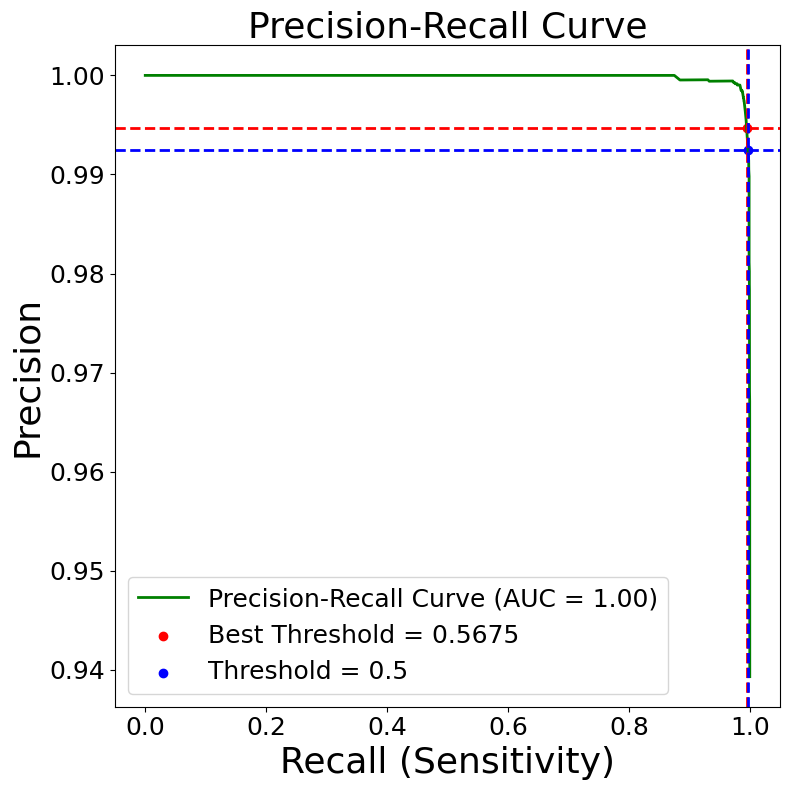

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import os

# Assuming 'Over Speeding' is the target variable


# Get predicted probabilities for class 1
# predicted_probabilities = lr_model.predict_proba(X_scaled)[:, 1]
probabilities = rfc.predict_proba(X_train_scaled)[:, 1]

# True labels
true_labels = rf_binary_labels

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(true_labels, predicted_probabilities)
pr_auc = auc(recall, precision)

# Find the index of the point where precision and recall are closest
intersect_index = np.argmin(np.abs(precision - recall))

# Get the threshold at the closest point
best_threshold = thresholds_pr[intersect_index]

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.scatter(recall[intersect_index], precision[intersect_index], color='red', marker='o', label=f'Best Threshold = {best_threshold:.4f}')
plt.scatter(recall[np.abs(thresholds_pr - 0.5).argmin()], precision[np.abs(thresholds_pr - 0.5).argmin()], color='blue', marker='o', label='Threshold = 0.5')

# Add horizontal and vertical lines for both points
plt.axhline(y=precision[intersect_index], color='red', linestyle='--', lw=2)
plt.axvline(x=recall[intersect_index], color='red', linestyle='--', lw=2)
plt.axhline(y=precision[np.abs(thresholds_pr - 0.5).argmin()], color='blue', linestyle='--', lw=2)
plt.axvline(x=recall[np.abs(thresholds_pr - 0.5).argmin()], color='blue', linestyle='--', lw=2)

plt.xlabel('Recall (Sensitivity)',fontsize=26)
plt.ylabel('Precision',fontsize=26)
plt.xticks(fontsize=18)  
plt.yticks(fontsize=18)  
plt.title('Precision-Recall Curve', fontsize=26)
plt.legend(loc='lower left',fontsize=18)



# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\DLR\final_paper'
file_name = 'pr_curve.png'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()
